## Librerias

In [1]:
# Importar paquetes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
#from scipy.stats import mannwhitneyu

#Librería para imputación múltiple
import miceforest as mf

#Para modelos

from sklearn.inspection import permutation_importance
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, precision_recall_curve, fbeta_score, recall_score,\
precision_recall_fscore_support, accuracy_score, precision_score, confusion_matrix,  f1_score, auc

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# MLFlow para el registro de los experimentos.
import mlflow
import mlflow.sklearn

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

Cargamos la base de datos (la cual se encuentra descrita en el manuscrito)

In [2]:
df = pd.read_excel("data/BD_C19_DSA.xlsx")
df.head()

,Hombre,Edad (años),Lugar de atención,Nivel educativo,Afiliación SGSSS,Indice de Charlson,Embarazo_si_no,Sintomas_n,Disnea,TAM,...,Disfonia,Sincope,Estertores,Roncus,Sibilancias,Tirajes,Hipoventilacion,Deshidratacion,Rx_ingreso_Con_alteraciones_si_no,Gravedad del COVID-19
0,1,52,Pereira,Sin informacion,Contributivo,1,0,5,1,108.666667,...,0,0,1,0,0,0,1,0,1,Neumonia grave
1,0,71,Pereira,Sin informacion,Contributivo,3,0,3,1,112.666667,...,0,0,1,0,0,0,1,0,1,Neumonia grave
2,0,28,Pereira,Sin informacion,Contributivo,0,0,10,1,101.000000,...,0,0,1,0,0,0,1,0,1,Enfermedad no complicada
3,0,40,Pereira,Profesional,Contributivo,0,0,2,0,113.666667,...,0,0,0,0,0,0,0,0,0,Enfermedad no complicada
4,1,46,Pereira,Secundaria,Contributivo,0,0,7,0,93.333333,...,0,0,0,0,0,0,0,0,1,Neumonia leve


In [3]:
df.shape

(774, 118)

Verificamos que cuenta con 774 filas (registros de pacientes únicos) y 118 variables

In [4]:
df.columns

Index(['Hombre', 'Edad (años)', 'Lugar de atención', 'Nivel educativo',
       'Afiliación SGSSS', 'Indice de Charlson', 'Embarazo_si_no',
       'Sintomas_n', 'Disnea', 'TAM',
       ...
       'Disfonia', 'Sincope', 'Estertores', 'Roncus', 'Sibilancias', 'Tirajes',
       'Hipoventilacion', 'Deshidratacion',
       'Rx_ingreso_Con_alteraciones_si_no', 'Gravedad del COVID-19'],
      dtype='object', length=118)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774 entries, 0 to 773
Columns: 118 entries, Hombre to Gravedad del COVID-19
dtypes: float64(12), int64(102), object(4)
memory usage: 713.7+ KB


In [6]:
for column in df.columns:
    print(column)

Hombre
Edad (años)
Lugar de atención
Nivel educativo
Afiliación SGSSS
Indice de Charlson
Embarazo_si_no
Sintomas_n
Disnea
TAM
FC ingreso
FR ingreso
T ingreso
Sat02 ingreso
Conciencia_alterada
CURB-65_calculado
Score News2_calculado
Oxigeno suplementario
Posición del paciente en prono
Complicaciones_n
Complicaciones_si_no
Hb ingreso
Hto ingreso
Leucocitos ingreso
Neutrofilos n absoluto ingreso
Linfocitos n absoluto ingreso
Plaquetas ingreso
Creatinina ingreso
Con_alteraciones_si_no
Ingreso a UCI
Muerto_si_no
Accidente cerebrovascular
Artritis reumatoide
Asma
Cardiopatia isquemica
Cirrosis/enfermedad hepática crónica
Demencia
Diabetes mellitus
Dislipidemia
Enfermedad de Parkinson
Enfermedad renal crónica
Enfermedad valvular
EPOC
Falla cardiaca
Hipertensión arterial
Hipotiroidismo
Lupus eritematoso sistémico
Neoplasia hematológica
Neoplasia sólida
Obesidad
Tabaquismo
Taquiarritmias supraventriculares
Transplantes
VIH
SAHOS
Epilepsia
HPB
TVP
Trastornos psiquiatricos
IECA/ARA2_si_no
Otros a

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hombre,774.0,0.614987,0.486913,0.0,0.0,1.0,1.0,1.0
Edad (años),774.0,56.891473,16.673521,19.0,45.0,57.0,68.0,100.0
Indice de Charlson,774.0,2.042636,2.018541,0.0,0.0,2.0,3.0,11.0
Embarazo_si_no,774.0,0.018088,0.133355,0.0,0.0,0.0,0.0,1.0
Sintomas_n,774.0,4.099483,1.701282,1.0,3.0,4.0,5.0,10.0
...,...,...,...,...,...,...,...,...
Sibilancias,774.0,0.029716,0.169912,0.0,0.0,0.0,0.0,1.0
Tirajes,774.0,0.073643,0.261359,0.0,0.0,0.0,0.0,1.0
Hipoventilacion,774.0,0.218346,0.413391,0.0,0.0,0.0,0.0,1.0
Deshidratacion,774.0,0.040052,0.196207,0.0,0.0,0.0,0.0,1.0


### Descripción del conjunto de datos

Verificando inicialmente la base, se tiene que: 

Es una base de datos con información de más de 700 pacientes atendidos de manera intrahospitalaria en cuatro clínicas de ciudades diferentes de Colombia. 

Todos los pacientes incluidos tienen COVID-19, aunque un pequeño grupo corresponde a casos de COVID-19 nosocomial.

Como grupos de variables de interés se tienen:
* Datos demográficos: como el sexo, edad, ciudad, afiliación al sistema general de seguridad social en salud, etc
* Datos clínicos:
    * Examen físico: examen físico general (frecuencia cardíaca, frecuencia respiratoria, temperatura, saturación de oxígeno) y datos de examen físico pulmonar (auscultación: sibilancias, tirajes intercostales, estertores, etc )
    * Signos y síntomas: fiebre, escalofrío, dolor, tos, etc
    * Clinimetría: puntajes clínicos del CURB-65, puntaje de Charlson (comorbilidades) y Score NEWS2
    * Antecedentes: patológicos (como hipertensión arterial, tromboembolismo pulmonar, enfermedad renal, etc) y farmacológicos (uso anterior de grupos farmacológicos específicos)
* Datos de laboratorios y paraclínicos:
    * Reporte de rayos X de tórax con o sin alteraciones
    * Química sanguínea y otros laboratorios (creatinina, hemoglobina, hematocrito, plaquetas, leucocitos, etc)
* Presencia o no de complicaciones intrahospitalarias
* Presencia o no de desenlaces en salud (ingreso a UCI, muerte)

In [8]:
#Solo variables cuantitativas
df.describe(exclude=['object']).T

,count,mean,std,min,25%,50%,75%,max
Hombre,774.0,0.614987,0.486913,0.0,0.0,1.0,1.0,1.0
Edad (años),774.0,56.891473,16.673521,19.0,45.0,57.0,68.0,100.0
Indice de Charlson,774.0,2.042636,2.018541,0.0,0.0,2.0,3.0,11.0
Embarazo_si_no,774.0,0.018088,0.133355,0.0,0.0,0.0,0.0,1.0
Sintomas_n,774.0,4.099483,1.701282,1.0,3.0,4.0,5.0,10.0
...,...,...,...,...,...,...,...,...
Sibilancias,774.0,0.029716,0.169912,0.0,0.0,0.0,0.0,1.0
Tirajes,774.0,0.073643,0.261359,0.0,0.0,0.0,0.0,1.0
Hipoventilacion,774.0,0.218346,0.413391,0.0,0.0,0.0,0.0,1.0
Deshidratacion,774.0,0.040052,0.196207,0.0,0.0,0.0,0.0,1.0


### Verificando si hay datos nulos

In [9]:
print(df.isnull().any())
print('Variables con faltantes:',df.isnull().any().sum())

Hombre                               False
Edad (años)                          False
Lugar de atención                    False
Nivel educativo                      False
Afiliación SGSSS                     False
                                     ...  
Tirajes                              False
Hipoventilacion                      False
Deshidratacion                       False
Rx_ingreso_Con_alteraciones_si_no    False
Gravedad del COVID-19                False
Length: 118, dtype: bool
Variables con faltantes: 12


In [10]:
#Verificando cantidad y porcentaje de nulos en los predictores
def tablanull(df):
    Nvalues = pd.DataFrame(df.isnull().sum())
    Nvalues[1] = round((Nvalues[0]/len(df)*100),2)
    Nvalues.columns = ['Nulos Totales','Porcentaje de Nulos']
    Nvalues = Nvalues[Nvalues['Nulos Totales'] > 0] # filter out rows with zero null values
    Nvalues = Nvalues.sort_values(by='Porcentaje de Nulos', ascending=False)
    return Nvalues
tablanull(df)

,Nulos Totales,Porcentaje de Nulos
Creatinina ingreso,151,19.51
Linfocitos n absoluto ingreso,109,14.08
Neutrofilos n absoluto ingreso,97,12.53
Hb ingreso,80,10.34
Hto ingreso,80,10.34
Plaquetas ingreso,80,10.34
Leucocitos ingreso,79,10.21
T ingreso,33,4.26
TAM,25,3.23
FR ingreso,24,3.10


### Variables categóricas

In [11]:
df.Hombre

0      1
1      0
2      0
3      0
4      1
      ..
769    0
770    1
771    1
772    1
773    1
Name: Hombre, Length: 774, dtype: int64

In [12]:
base_cat = df.select_dtypes(exclude=['int', 'float']) #seleccionamos solo las variables categóricas para ver sus frecuencias
for col in base_cat.columns:
    print("\n"+'\033[1m' + col + '\033[0m' + "\n") #poner negrita en cada nombre de variable
    print(base_cat[col].unique()) # categorías únicas dentro de cada variable
    print(base_cat[col].value_counts())
    print("Valores perdidos:", base_cat[col].isnull().sum()) #verificamos perdidos x v/ble


Lugar de atención

['Pereira' 'Bogotá' 'Cali' 'Popayan']
Lugar de atención
Bogotá     304
Cali       302
Pereira     96
Popayan     72
Name: count, dtype: int64
Valores perdidos: 0

Nivel educativo

['Sin informacion' 'Profesional' 'Secundaria' 'Primaria' 'Tecnico'
 'Postgrado' 'secundaria ' 'secundaria' 'primaria']
Nivel educativo
Sin informacion    604
Secundaria          41
Profesional         39
Primaria            35
Tecnico             27
secundaria          20
secundaria           4
Postgrado            2
primaria             2
Name: count, dtype: int64
Valores perdidos: 0

Afiliación SGSSS

['Contributivo' 'Otro' 'Subsidiado' 'Sin información']
Afiliación SGSSS
Contributivo       670
Subsidiado          92
Otro                11
Sin información      1
Name: count, dtype: int64
Valores perdidos: 0

Gravedad del COVID-19

['Neumonia grave' 'Enfermedad no complicada' 'Neumonia leve']
Gravedad del COVID-19
Neumonia grave              427
Enfermedad no complicada    181
Neumonia le

### Variables dicotómicas y cuantitativas

In [13]:
base_cont = df.select_dtypes(include=['int', 'float']) #seleccionamos solo las variables numéricas
for col in base_cont.columns:
    print("\n"+'\033[1m' + col + '\033[0m' + "\n") #poner negrita en cada nombre de variable
    print(base_cont[col].value_counts())
    print("Valores perdidos:", base_cont[col].isnull().sum()) #verificamos perdidos x v/ble


Hombre

Hombre
1    476
0    298
Name: count, dtype: int64
Valores perdidos: 0

Edad (años)

Edad (años)
54    26
60    24
53    23
56    23
65    22
      ..
94     2
88     2
22     2
21     2
95     1
Name: count, Length: 77, dtype: int64
Valores perdidos: 0

Indice de Charlson

Indice de Charlson
0     211
1     168
2     131
3     104
4      62
5      49
6      25
8      12
7       7
11      2
10      2
9       1
Name: count, dtype: int64
Valores perdidos: 0

Embarazo_si_no

Embarazo_si_no
0    760
1     14
Name: count, dtype: int64
Valores perdidos: 0

Sintomas_n

Sintomas_n
4     167
3     159
5     154
2     107
6      76
7      53
1      36
8      18
9       3
10      1
Name: count, dtype: int64
Valores perdidos: 0

Disnea

Disnea
1    523
0    251
Name: count, dtype: int64
Valores perdidos: 0

TAM

TAM
96.666667     27
93.333333     25
83.333333     24
86.666667     23
90.000000     23
              ..
144.000000     1
114.666667     1
111.000000     1
112.333333     1
85.33

### Matriz de correlación

Matriz de correlación


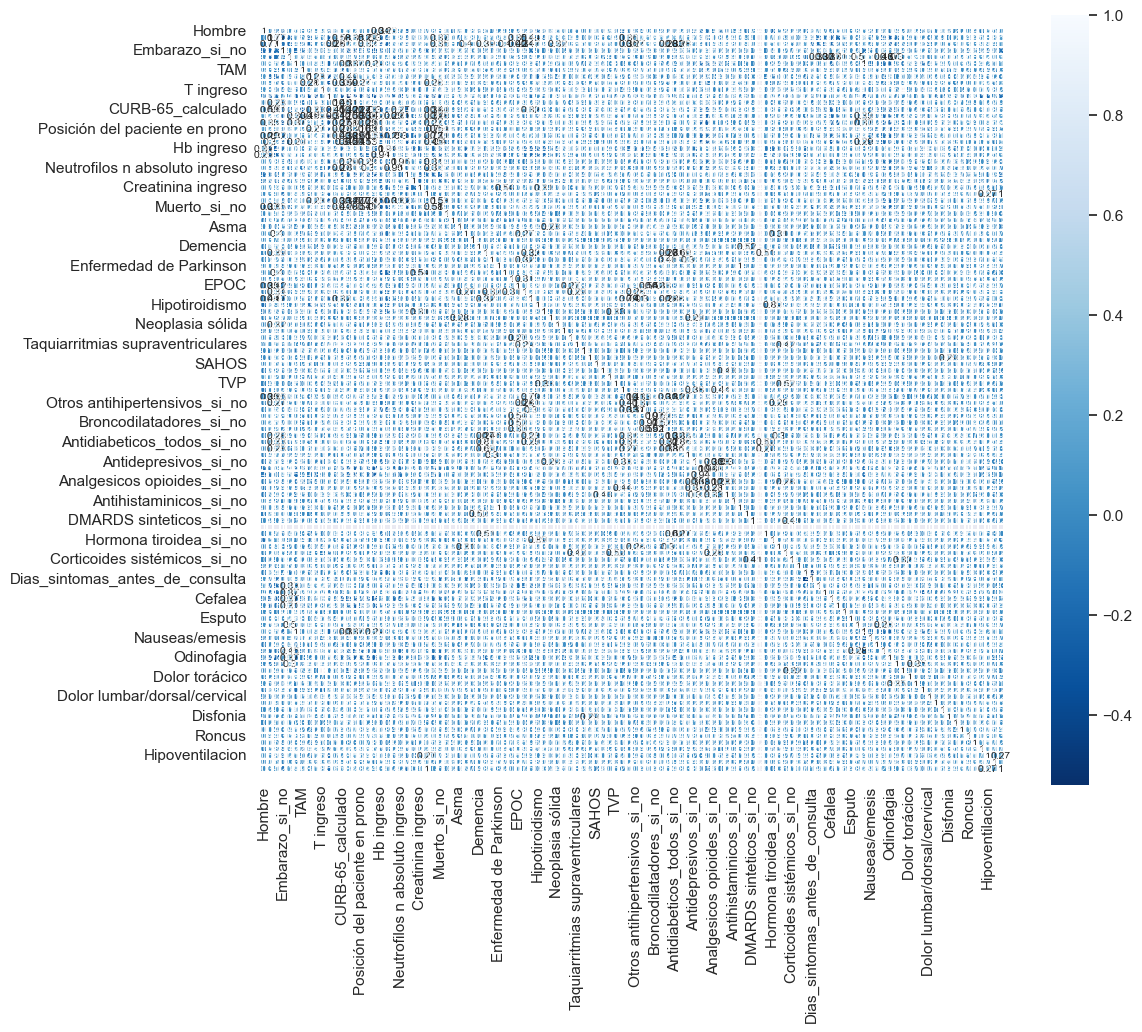

In [14]:
# Verificamos la correlación de la variables.
print('Matriz de correlación')
matriz = pd.DataFrame(base_cont).corr(method='pearson').round(2)

sns.set(rc = {'figure.figsize':(12,10)})
sns.heatmap(matriz, annot=True, annot_kws={'size': 7.5}, square=True, linewidths=0.1, linecolor="white", cmap="Blues_r")

plt.show()

**Histogramas de variables numéricas**

In [15]:
Vbles_cuanti = ['Edad (años)', 'Indice de Charlson', 'Sintomas_n', 'TAM', 'FC ingreso', 'FR ingreso',
                'T ingreso', 'Sat02 ingreso', 'CURB-65_calculado', 'Score News2_calculado', 'Hb ingreso', 'Hto ingreso', 
                'Leucocitos ingreso', 'Neutrofilos n absoluto ingreso', 'Linfocitos n absoluto ingreso',
                'Plaquetas ingreso', 'Creatinina ingreso', 'Complicaciones_n']
               

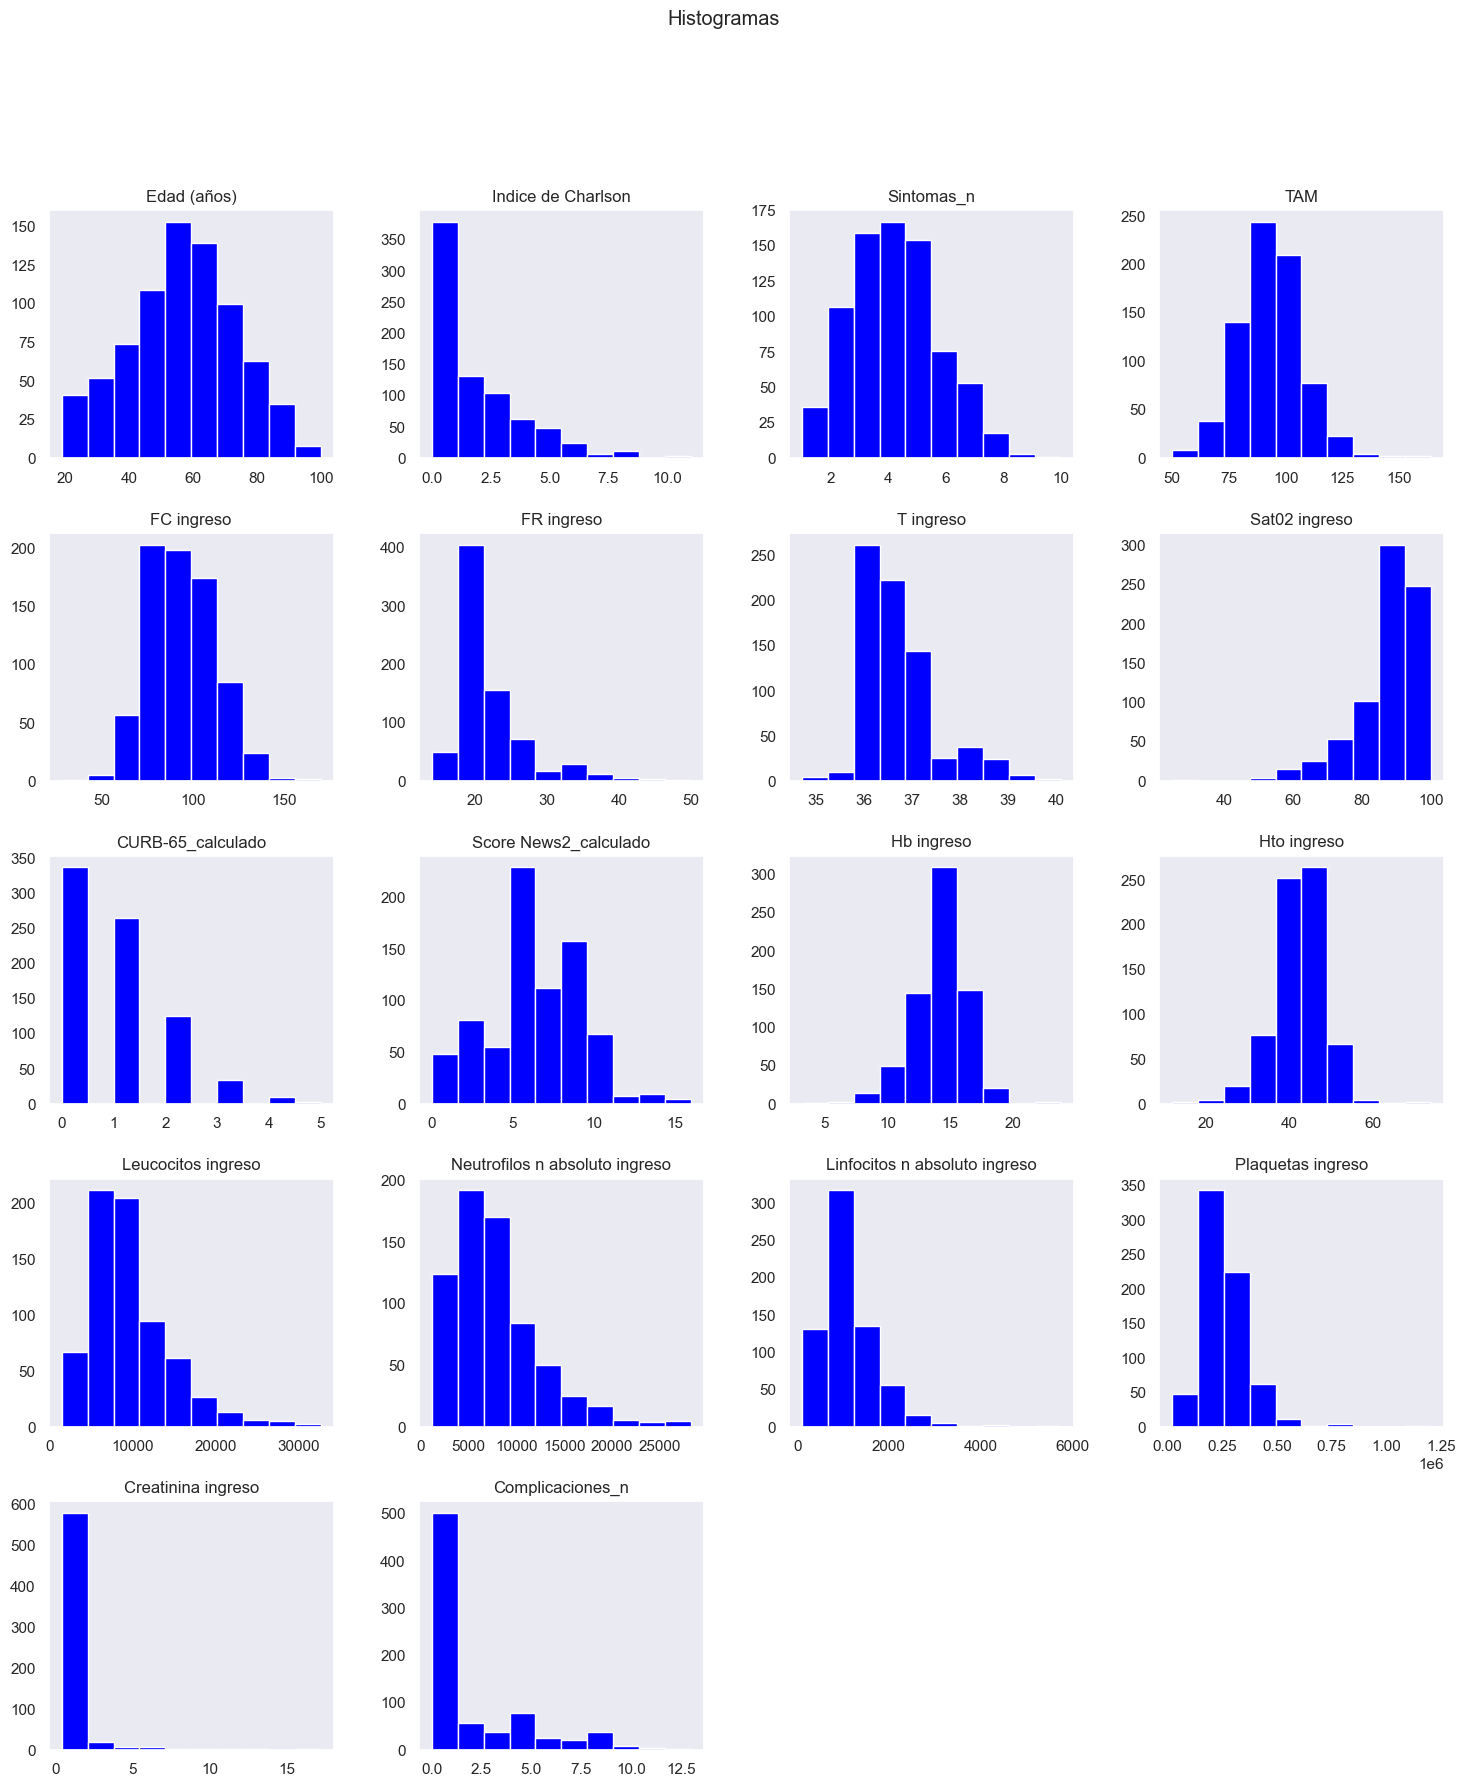

In [16]:
base_cont[Vbles_cuanti].hist(figsize=(18, 20),grid=False, color='blue',rwidth = 1.5)
plt.suptitle('Histogramas')
plt.show()

**Histogramas de variables categóricas**

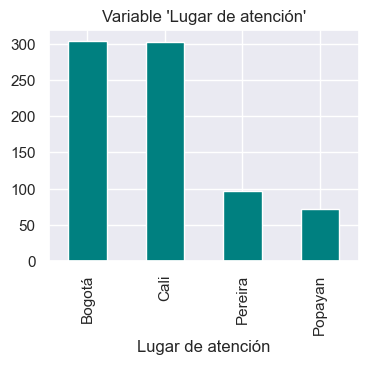

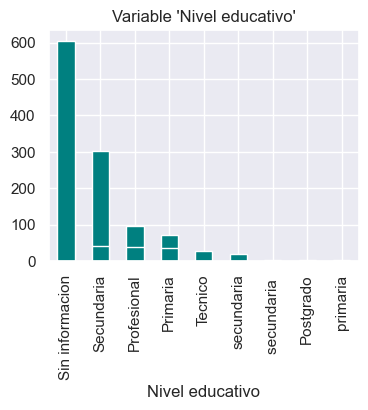

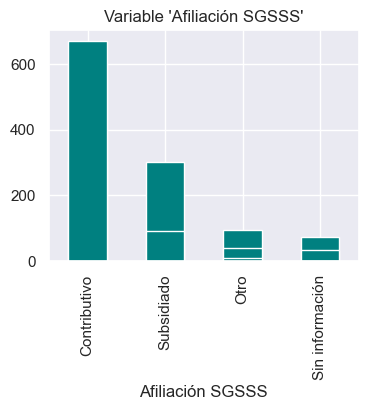

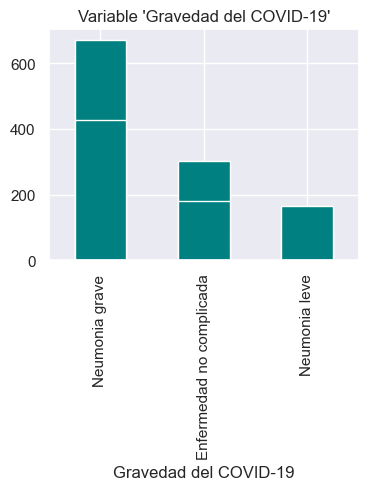

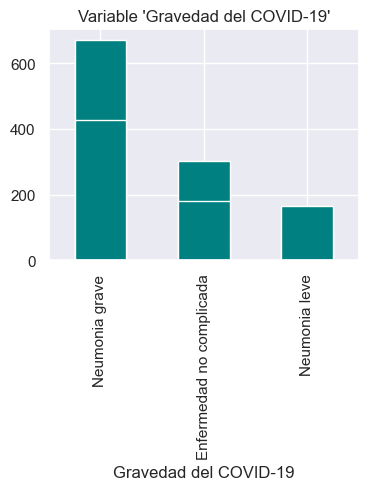

In [17]:
figsize = (4,3)
variables = ['Lugar de atención', 'Nivel educativo', 'Afiliación SGSSS', 'Gravedad del COVID-19' ]
for variable in variables:
    ax = base_cat[variable].value_counts().plot.bar(title=f"Variable '{variable}'", color='teal', figsize=figsize)
    display(ax.figure);

**Conclusiones sobre variables**

- Las variables Hb ingreso, Leucocitos ingreso, Neutrofilos n absoluto ingreso, Linfocitos n absoluto ingreso, Plaquetas ingreso y Creatinina ingreso, tienen más del 10% de datos perdidos
- El índice de Charlson presenta alta correlación con la edad, dado que esta variable se incluye en el cálculo de dicho índice. Algo similar ocurre con el puntaje del CURB-65 (los pacientes de 65 años o más tienen más riesgo de desenlaces adversos por neumonía)
- La variable de hemoglobina (Hb) al ingreso se correlaciona con Hematocrito (Hto) al ingreso. En términos prácticos miden aspectos muy similares de la química sanguínea, se puede eliminar una.
- La variable Leucocitos ingreso se relaciona con neutrófilos y linfocitos al ingreso. Esto se debe a que los leucocitos son un valor dado por la suma de los diferentes glóbulos blancos, siendo los neutrófilos y los linfocitos los principales en cantidad. Se podría trabajar simplemente con los leucocitos al ingreso
- Disnea.1 es lo mismo que disnea. 'Con_alteraciones_si_no'es lo mismo que Rx. Se debe eliminar una.
- Hay pacientes con COVID Nosocomial (lo adquirieron durante la hospitalización). No aplican para este análisis, se deben eliminar.
- DMARDS biológicos_si_no: nadie usó estos medicamentos. Se elimina esta variable. 
- En general las variables presentadas son aquellas que se miden al ingreso del paciente a hospitalización, aunque algunas son de desenlace (las complicaciones, muerte, ingreso a UCI y posición prono), por lo cual no deben ser consideradas para los análisis
- 'Broncodilatadores_corticoides_todos_si_no', 'Antidiabeticos_todos_si_no' hacen referencia a otros grupos de medicamentos en conjunto. Se pueden eliminar.

Además se agruparon las variables en las siguientes categorías:

In [18]:
síntomas = [ 'Ageusia/disgeusia', 'Cefalea', 'Cianosis', 'Conciencia_alterada', 'Congestion conjuntival',
'Congestion nasal/rinorrea', 'Deshidratacion', 'Diarrea', 'Dias_sintomas_antes_de_consulta',
'Disfonia', 'Disnea', 'Dolor abdominal', 'Dolor lumbar/dorsal/cervical', 'Dolor torácico',
'Erupciones cutaneas', 'Esputo',  'Fatiga', 'Fiebre/escalofrios', 
'Hiporexia', 'Hiposmia/anosmia', 'Mialgias/artralgias', 'Nauseas/emesis', 'Odinofagia',
'Sincope', 'Tos']

Antecedentes = ['Accidente cerebrovascular', 'Cardiopatia isquemica', 
'Cirrosis/enfermedad hepática crónica','Demencia','Diabetes mellitus','Dislipidemia',
'EPOC','Enfermedad de Parkinson','Enfermedad renal crónica','Enfermedad valvular',
'Epilepsia','Falla cardiaca','HPB','Hipertensión arterial','Hipotiroidismo',
'Lupus eritematoso sistémico','Neoplasia hematológica','Neoplasia sólida',
'Obesidad','SAHOS','TVP','Tabaquismo','Taquiarritmias supraventriculares',
'Transplantes','Trastornos psiquiatricos','VIH', 'Asma', 'Artritis reumatoide']

Clinimetria = ['CURB-65_calculado', 'Indice de Charlson', 'Score News2_calculado']

Gravedad = ['Gravedad del COVID-19']

Examen_fisico = ['FC ingreso', 'FR ingreso', 'Hipoventilacion', 'Roncus', 'Sat02 ingreso', 'Sibilancias',
'T ingreso', 'TAM', 'Tirajes','Estertores',]

Farmacos = ['Analgesicos no opioides_si_no', 'Analgesicos opioides_si_no', 'Analgesicos_todos_si_no',
'Antiagregantes plaquetarios_si_no', 'Antibióticos_si_no', 'Anticoagulantes_si_no', 'Antidemenciales_si_no',
'Antidepresivos_si_no', 'Antidiabeticos orales_si_no','Antiepilepticos_si_no','Antihistaminicos_si_no',
'Antiparkinsonianos_si_no','Antipsicoticos_si_no','Antiulcerosos_si_no','Broncodilatadores_si_no',
'Corticoides inhalados_si_no','Corticoides sistémicos_si_no','DMARDS biológicos_si_no','DMARDS sinteticos_si_no',
'Diureticos_si_no','Hipolipemiantes_si_no','Hormona tiroidea_si_no','IECA/ARA2_si_no','Insulinas_si_no',
'Otros antihipertensivos_si_no','Oxigeno suplementario']

General = ['Edad (años)', 'Embarazo_si_no', 'Hombre', 'Lugar de atención', 'Nivel educativo', 'Afiliación SGSSS']

Laboratorios = ['Creatinina ingreso', 'Hb ingreso', 'Leucocitos ingreso', 'Plaquetas ingreso', 
                'Rx_ingreso_Con_alteraciones_si_no', 'Hto ingreso', 'Neutrofilos n absoluto ingreso',
                'Linfocitos n absoluto ingreso']

**Preparación de los datos**

In [19]:
#eliminamos COVID nosocomial
df2 = df[df['COVID Nosocomial']==0]
df2.shape

(767, 118)

In [20]:
#seleccionamos la base dejando por fuera las variables que no sirven o son redundantes
df2 = df2[df2.columns.difference(['Hto ingreso','Neutrofilos n absoluto ingreso',
                                    'Linfocitos n absoluto ingreso','Complicaciones_si_no',
                                    'Complicaciones_n','Posición del paciente en prono',
                                    'DMARDS biológicos_si_no', 'Disnea.1', 'Con_alteraciones_si_no',
                               'Broncodilatadores_corticoides_todos_si_no', 'Antidiabeticos_todos_si_no', 'COVID Nosocomial' ])]
df2.head(5)

,Accidente cerebrovascular,Afiliación SGSSS,Ageusia/disgeusia,Analgesicos no opioides_si_no,Analgesicos opioides_si_no,Analgesicos_todos_si_no,Antiagregantes plaquetarios_si_no,Antibióticos_si_no,Anticoagulantes_si_no,Antidemenciales_si_no,...,T ingreso,TAM,TVP,Tabaquismo,Taquiarritmias supraventriculares,Tirajes,Tos,Transplantes,Trastornos psiquiatricos,VIH
0,0,Contributivo,0,0,0,0,0,0,0,0,...,36.3,108.666667,0,0,0,0,1,0,0,0
1,0,Contributivo,0,0,0,0,0,0,0,0,...,36.5,112.666667,0,0,0,0,1,0,0,0
2,0,Contributivo,0,0,0,0,0,0,0,0,...,38.0,101.000000,0,0,0,0,1,0,0,0
3,0,Contributivo,0,0,0,0,0,0,0,0,...,36.0,113.666667,0,0,0,0,1,0,0,0
4,0,Contributivo,0,0,0,0,0,0,0,0,...,38.5,93.333333,0,0,0,0,1,0,0,0


**Transformación a la variable Nivel Educativo**

In [21]:
df2['Nivel educativo'] = df2['Nivel educativo'].str.strip()

In [22]:
df2['Nivel educativo'] = df2['Nivel educativo'].map({'primaria':'Primaria', 'Primaria':'Primaria',
                                                             'secundaria':'Secundaria', 'Secundaria':'Secundaria', 
                                                             'Sin informacion':'Sin informacion', 
                                                             'Profesional':'Profesional',
                                                             'Tecnico':'Tecnico', 
                                                             'Postgrado':'Postgrado',})

In [23]:
df2['Nivel educativo'].value_counts()

Nivel educativo
Sin informacion    598
Secundaria          65
Profesional         39
Primaria            36
Tecnico             27
Postgrado            2
Name: count, dtype: int64

In [24]:
#Encoding variables categóricas
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['Afiliación SGSSS'] = le.fit_transform(df2['Afiliación SGSSS'])
df2['Lugar de atención'] = le.fit_transform(df2['Lugar de atención'])
df2['Nivel educativo'] = le.fit_transform(df2['Nivel educativo'])
df2['Gravedad del COVID-19'] = le.fit_transform(df2['Gravedad del COVID-19'])
df2.head()

,Accidente cerebrovascular,Afiliación SGSSS,Ageusia/disgeusia,Analgesicos no opioides_si_no,Analgesicos opioides_si_no,Analgesicos_todos_si_no,Antiagregantes plaquetarios_si_no,Antibióticos_si_no,Anticoagulantes_si_no,Antidemenciales_si_no,...,T ingreso,TAM,TVP,Tabaquismo,Taquiarritmias supraventriculares,Tirajes,Tos,Transplantes,Trastornos psiquiatricos,VIH
0,0,0,0,0,0,0,0,0,0,0,...,36.3,108.666667,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,36.5,112.666667,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,38.0,101.000000,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,36.0,113.666667,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,38.5,93.333333,0,0,0,0,1,0,0,0


In [25]:
df3 = df2.copy()

In [26]:
#REALIZAMOS IMPUTACIÓN MÚLTIPLE

# Se crea el kernel. 
kds = mf.ImputationKernel(
  df3,
  save_all_iterations=True,
  random_state=100
)

# Se corre MICE con 5 iteraciones
kds.mice(iterations=5, n_estimators=50)

# Base sin valores perdidos
df_imputed_multiple = kds.complete_data()

In [27]:
#Comprobando nulos
df_imputed_multiple.isnull().sum().sum()

0

La base finalmente, luego de la imputación, cuenta con 767 registros y 106 variables/columnas

In [28]:
df_imputed_multiple.shape

(767, 106)

In [29]:
#df_imputed_multiple.to_excel("base1.xlsx") 

# Selección de variables para el modelo
Dado que se cuenta con más de 100 variables predictoras, se aplicarán técnicas de selección para limitar la cantidad y simplificar el modelo. Esto permitirá que los usuarios tengan menor número de variables necesarias a introducir en el tablero para generar las predicciones

In [30]:
y = df_imputed_multiple['Ingreso a UCI']
X = df_imputed_multiple[df_imputed_multiple.columns.difference(['Muerto_si_no','Ingreso a UCI' ])]

In [31]:
#se estandariza la base
scaler = StandardScaler()
data_transformed = scaler.fit_transform(X)
data_transformed = pd.DataFrame(data_transformed, columns = X.columns )
data_transformed.head()

,Accidente cerebrovascular,Afiliación SGSSS,Ageusia/disgeusia,Analgesicos no opioides_si_no,Analgesicos opioides_si_no,Analgesicos_todos_si_no,Antiagregantes plaquetarios_si_no,Antibióticos_si_no,Anticoagulantes_si_no,Antidemenciales_si_no,...,T ingreso,TAM,TVP,Tabaquismo,Taquiarritmias supraventriculares,Tirajes,Tos,Transplantes,Trastornos psiquiatricos,VIH
0,-0.126072,-0.382908,-0.150555,-0.280646,-0.108965,-0.296552,-0.208656,-0.171844,-0.114935,-0.062663,...,-0.492792,1.123680,-0.062663,-0.272451,-0.102665,-0.28334,0.595923,-0.062663,-0.108965,-0.062663
1,-0.126072,-0.382908,-0.150555,-0.280646,-0.108965,-0.296552,-0.208656,-0.171844,-0.114935,-0.062663,...,-0.241481,1.410753,-0.062663,-0.272451,-0.102665,-0.28334,0.595923,-0.062663,-0.108965,-0.062663
2,-0.126072,-0.382908,-0.150555,-0.280646,-0.108965,-0.296552,-0.208656,-0.171844,-0.114935,-0.062663,...,1.643349,0.573458,-0.062663,-0.272451,-0.102665,-0.28334,0.595923,-0.062663,-0.108965,-0.062663
3,-0.126072,-0.382908,-0.150555,-0.280646,-0.108965,-0.296552,-0.208656,-0.171844,-0.114935,-0.062663,...,-0.869758,1.482521,-0.062663,-0.272451,-0.102665,-0.28334,0.595923,-0.062663,-0.108965,-0.062663
4,-0.126072,-0.382908,-0.150555,-0.280646,-0.108965,-0.296552,-0.208656,-0.171844,-0.114935,-0.062663,...,2.271626,0.023237,-0.062663,-0.272451,-0.102665,-0.28334,0.595923,-0.062663,-0.108965,-0.062663


In [32]:
X2 = data_transformed.copy()

In [33]:
# Split 
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.20, random_state=0)

Index(['Leucocitos ingreso', 'Gravedad del COVID-19', 'Creatinina ingreso',
       'Sat02 ingreso', 'FR ingreso', 'Hb ingreso', 'Edad (años)',
       'Score News2_calculado', 'TAM', 'CURB-65_calculado',
       'Plaquetas ingreso', 'FC ingreso', 'Dias_sintomas_antes_de_consulta',
       'T ingreso', 'Lugar de atención'],
      dtype='object')


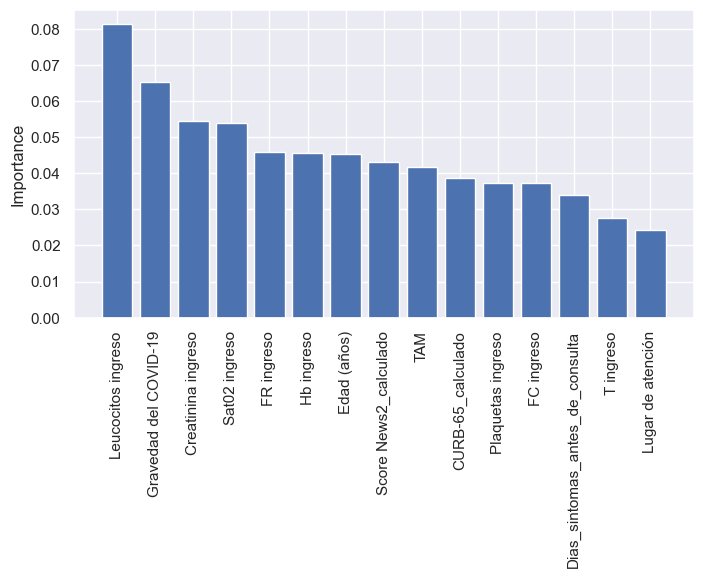

In [34]:
#Seleccion de variables en Xtrain y ytrain
# RFClassifier
rf_feature = RandomForestClassifier()
rf_feature.fit(X_train, y_train)

importances = rf_feature.feature_importances_


sorted_idx = importances.argsort()[::-1]
sorted_importances = importances[sorted_idx][:15] 
sorted_features = X_train.columns[sorted_idx][:15] 

print(sorted_features)

fig, ax = plt.subplots(figsize=(8, 4))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.ylabel('Importance')
plt.show();

Text(0, 0.5, 'MI scores')

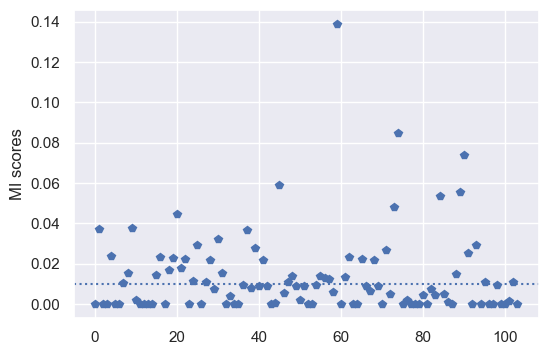

In [35]:
#Seleccion por mutual information
from sklearn.feature_selection import mutual_info_regression
mu_inf = mutual_info_regression(X_train, y_train, discrete_features = False, n_neighbors = 9)

plt.figure(figsize = (6,4))
plt.plot(mu_inf,'p')
plt.axhline(y=0.01,ls=':',color='b')  #Threshold
plt.ylabel('MI scores')

In [36]:
# Ranking de variables en orden de menor a mayor, métrica Mutual information
mu_inf_ = pd.Series(mu_inf)
mu_inf_.index = X2.columns
mu_inf_.sort_values(ascending=True)

mutual = list()
for i in range(len(mu_inf_)):
    if mu_inf_.iloc[i] > 0.02:
        mutual.append(mu_inf_.index[i])
mutual

['Afiliación SGSSS',
 'Analgesicos opioides_si_no',
 'Antidemenciales_si_no',
 'Antiulcerosos_si_no',
 'Broncodilatadores_si_no',
 'CURB-65_calculado',
 'Cefalea',
 'Conciencia_alterada',
 'Corticoides inhalados_si_no',
 'Creatinina ingreso',
 'Disfonia',
 'Disnea',
 'Dolor abdominal',
 'Edad (años)',
 'Gravedad del COVID-19',
 'Hipertensión arterial',
 'Hiposmia/anosmia',
 'Hombre',
 'Indice de Charlson',
 'Leucocitos ingreso',
 'Lugar de atención',
 'Oxigeno suplementario',
 'Sat02 ingreso',
 'Score News2_calculado',
 'Sibilancias',
 'Sintomas_n']

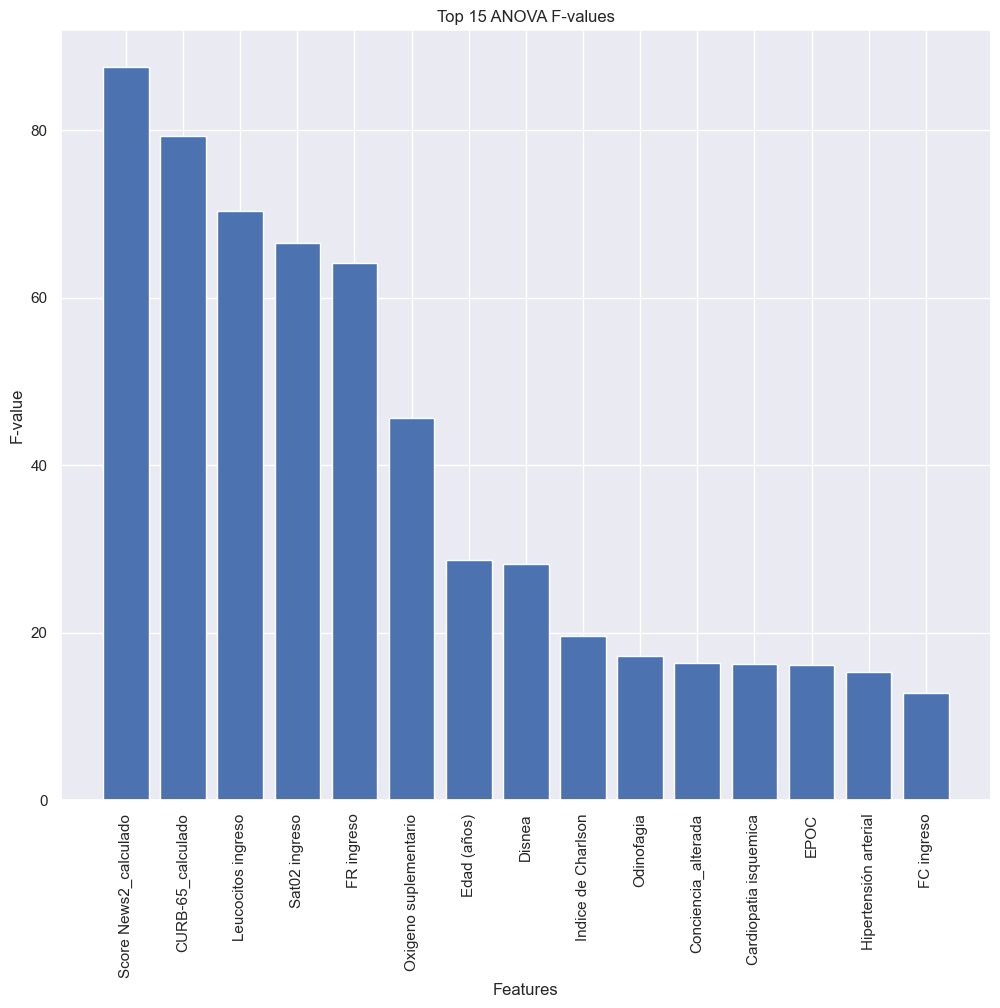

In [37]:
from sklearn.feature_selection import SelectKBest , RFE, f_regression

#Feature Selection Anova
# Top 15 features de ANOVA F-value
selector = SelectKBest(score_func=f_regression, k=15)
X_new = selector.fit_transform(X_train, y_train)

scores = selector.scores_
top_k_scores = sorted(scores, reverse=True)[:15]
top_k_feature_names = []
for score in top_k_scores:
    index = list(scores).index(score)
    top_k_feature_names.append(X_train.columns[index])

plt.bar(range(len(top_k_scores)), top_k_scores)
plt.xticks(range(len(top_k_scores)), top_k_feature_names, rotation='vertical')
plt.title('Top 15 ANOVA F-values')
plt.xlabel('Features')
plt.ylabel('F-value')
plt.show()

In [38]:
from sklearn.ensemble import RandomForestRegressor
#RFE- selección de variables método envolutura
rf_rfe = RandomForestRegressor()
rfe = RFE(estimator=rf_rfe, n_features_to_select=15, step=2)
rfe.fit(X_train, y_train)
print("Selected features:")
print(X_train.columns[rfe.support_])

Selected features:
Index(['Creatinina ingreso', 'Dias_sintomas_antes_de_consulta', 'Edad (años)',
       'FC ingreso', 'FR ingreso', 'Gravedad del COVID-19', 'Hb ingreso',
       'Leucocitos ingreso', 'Lugar de atención', 'Plaquetas ingreso',
       'Sat02 ingreso', 'Score News2_calculado', 'Sintomas_n', 'T ingreso',
       'TAM'],
      dtype='object')


Text(0, 0.5, 'F scores')

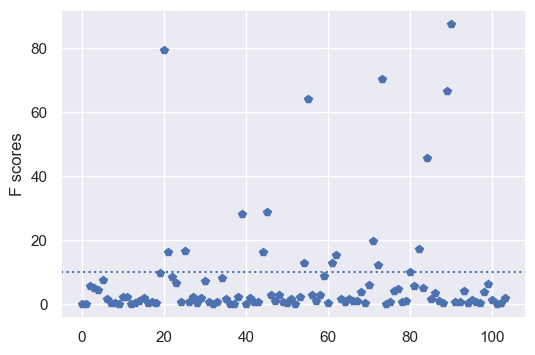

In [39]:
#Selección de variables usando la métrica F
ftest=f_regression(X_train, y_train)

plt.figure(figsize = (6,4))
plt.plot(ftest[0],'p')
plt.axhline(y = 10,ls = ':',color = 'b')  #Threshold en 30
plt.ylabel('F scores')

In [48]:
# Ranking de variables en orden de menor a mayor, métrica F
ftest_ = pd.Series(ftest[0])
ftest_.index = X2.columns
ftest_.sort_values(ascending = True)

metricaF = list()
for i in range(len(ftest_)):
    if ftest_.iloc[i] > 10:
        metricaF.append(ftest_.index[i])
metricaF

['CURB-65_calculado',
 'Cardiopatia isquemica',
 'Conciencia_alterada',
 'Disnea',
 'EPOC',
 'Edad (años)',
 'FC ingreso',
 'FR ingreso',
 'Hb ingreso',
 'Hipertensión arterial',
 'Indice de Charlson',
 'Insulinas_si_no',
 'Leucocitos ingreso',
 'Odinofagia',
 'Oxigeno suplementario',
 'Sat02 ingreso',
 'Score News2_calculado']

A partir de los análisis anteriores, y considerando la plausibilidad biológica y juicio médico, se seleccionaron las siguientes variables para incluir en el modelo:

In [41]:
#Listado de variables seleccionadas
seleccionadas = ['CURB-65_calculado', 
'Disnea', 
'Edad (años)', 
'Leucocitos ingreso', 
'Sat02 ingreso',
'Score News2_calculado',
'Creatinina ingreso',
'Dias_sintomas_antes_de_consulta',
'FR ingreso',
'FC ingreso',
'Indice de Charlson',
'Oxigeno suplementario',
'Hb ingreso',
'Plaquetas ingreso']

In [42]:
#Variables seleccionadas, organizadas en grupos
#Valoración general
'Edad (años)', 
'Dias_sintomas_antes_de_consulta',
'FC ingreso',
'FR ingreso',
'Disnea', 
'Sat02 ingreso',
'Oxigeno suplementario',

#Clinimetría
'Indice de Charlson',
'Score News2_calculado',
'CURB-65_calculado', 

#Laboratorio
'Hb ingreso',
'Leucocitos ingreso', 
'Plaquetas ingreso',
'Creatinina ingreso'

'Creatinina ingreso'

La Gravedad del COVID-19, a pesar de aparecer en varios métodos de selección de variables, no fue incluido dado que ya implica un proceso previo de clasificación de los pacientes, lo que puede incluir sesgo en el modelo predictivo. Las comorbilidades no fueron incluidas porque el índice de Charlson tiene incorporada esta información.  

# Realizando random forest

NOTA: X está transformada. NO se ha realizado SMOTE

In [43]:
# Split 
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.20, random_state=123)

In [44]:
#se crea una función para evaluar los diferentes modelos
# def modelo_score(nombremodelo, model, X_train, X_test, y_train, y_test, test=True):
#     model.fit(X_train, y_train)
#     if test:
#         test_pred = model.predict(X_test)
#         test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
#         print(f'{nombremodelo} AUC score (test): {test_auc:.4}\n')
#         test_accuracy = accuracy_score(y_test, test_pred)
#         print(f'{nombremodelo} accuracy score (test): {test_accuracy:.4}\n')        
#         test_recall = recall_score(y_test, test_pred)
#         print(f'{nombremodelo} recall score (test): {test_recall:.4}\n')
#         test_cm = confusion_matrix(y_test, test_pred)
#         cm_display = ConfusionMatrixDisplay(confusion_matrix = test_cm, display_labels = [False, True])
#         cm_display.plot(cmap=plt.cm.Blues)
#         plt.show()
#     return model

In [45]:
# rf1 = modelo_score('RF', RandomForestClassifier(random_state=123),
#                        X_train, X_test,
#                        y_train, y_test, test=True)


Accuracy: 0.7662
Precision: 0.7250
Recall (Sensibilidad): 0.5370
Especificidad: 0.8900
F1 Score: 0.617
AUC: 0.8365



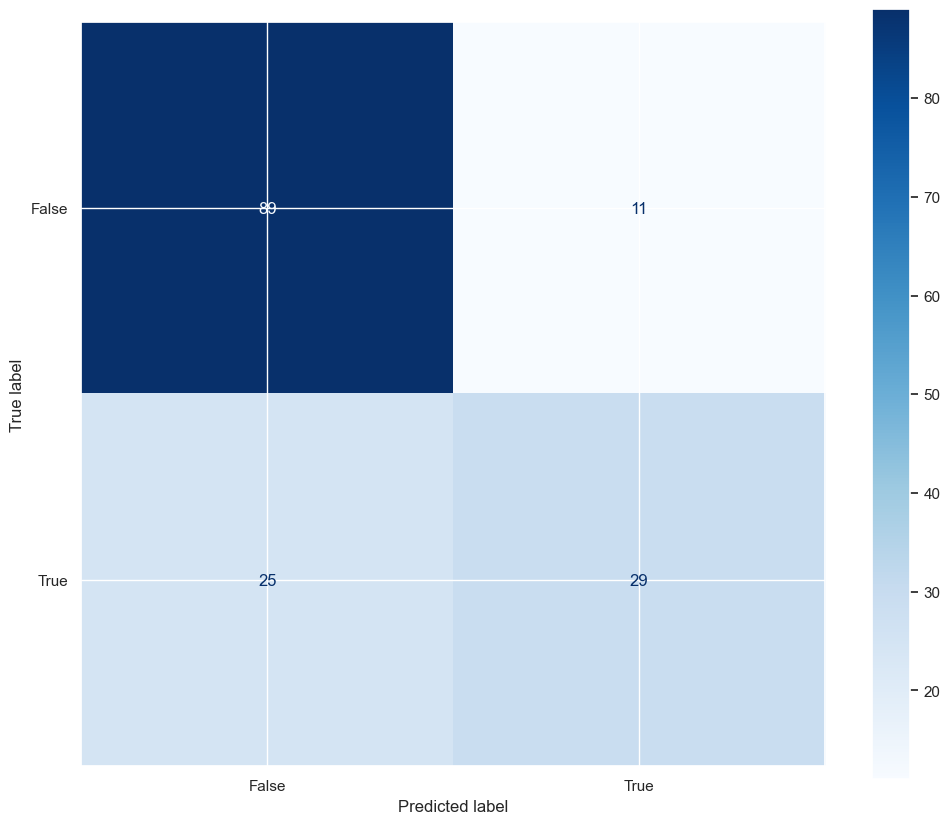

In [49]:
# Se registra el experimento en MLFlow.
experiment = mlflow.set_experiment("RandomForestClassifier")

# Aquí se ejecuta MLflow sin especificar un nombre o id del experimento.
with mlflow.start_run(experiment_id=experiment.experiment_id):
    
    # Parametros
    n_estimators=100
    criterion='gini'
    max_depth=None
    min_samples_split=2
    min_samples_leaf=1
    min_weight_fraction_leaf=0.0
    max_features='sqrt'
    max_leaf_nodes=None
    min_impurity_decrease=0.0
    bootstrap=True
    oob_score=False
    n_jobs=-1
    verbose=0
    warm_start=False
    class_weight=None
    ccp_alpha=0.0
    max_samples=None
    
    # Estimación
    RF = RandomForestClassifier(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth, min_samples_split=min_samples_split,
                                min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_features=max_features,
                                max_leaf_nodes=max_leaf_nodes, min_impurity_decrease=min_impurity_decrease, bootstrap=bootstrap, oob_score=oob_score, 
                                n_jobs=n_jobs, verbose=verbose, warm_start=warm_start, class_weight=class_weight, ccp_alpha=ccp_alpha,
                                max_samples=max_samples,
                                random_state=123)
    # Entrenamiento
    RF.fit(X_train2, y_train2)
    
    #Evaluación
    pred_RF = RF.predict(X_test2)
    predProba_RF = RF.predict_proba(X_test2)
    
    # Registro de los parámetros
    mlflow.log_param("n_estimators", n_estimators)
    mlflow.log_param("criterion", criterion)
    mlflow.log_param("max_depth", max_depth)
    mlflow.log_param("class_weight", class_weight)
    mlflow.log_param("max_samples", max_samples)
    
    # Registro del modelo
    mlflow.sklearn.log_model(RF, "RandomForest_model")
    
    # Cálculo de métricas 
    tn, fp, fn, tp = confusion_matrix(y_test2, pred_RF).ravel()
    RFspec = tn/(tn+fp)
    RFaccuracy = accuracy_score(y_test2, pred_RF)
    RFprecision = precision_score(y_test2, pred_RF)
    RFrecall = recall_score(y_test2, pred_RF)
    RFf1 = f1_score(y_test2, pred_RF)
    # curva ROC
    fpr, tpr, thresholds = roc_curve(y_test2, predProba_RF[:,1], pos_label = 1)
    # Area bajo la Curva - AUC 
    AUCRF = round(auc(fpr, tpr),4)
    
    # Registro de las métricas de interés
    mlflow.log_metric("auc", AUCRF)
    mlflow.log_metric("accuracy", RFaccuracy)
    mlflow.log_metric("precision", RFprecision)
    mlflow.log_metric("sensibilidad", RFrecall)
    mlflow.log_metric("especificidad", RFspec)
    mlflow.log_metric("f1 score", RFf1)
    
    print('\nAccuracy: %.4f' % RFaccuracy)
    print('Precision: %.4f' % RFprecision)
    print('Recall (Sensibilidad): %.4f' % RFrecall)
    print('Especificidad: %.4f' % RFspec)
    print("F1 Score:", round(RFf1,4))
    print('\033[1m'+'AUC: %.4f\n' % AUCRF + '\033[0m')

    Matrix = confusion_matrix(y_test2, pred_RF)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = Matrix, display_labels = [False, True])
    cm_display.plot(cmap=plt.cm.Blues)
    plt.savefig("RF_conf_matrix.png")
    plt.show()
    
    # Registro de la matriz de confusión
    mlflow.log_artifact("RF_conf_matrix.png")